In [150]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)
options(warn = 1)


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



Observe Structure of data

In [37]:
pkmn <- read.csv(file = "Pokemon.csv", header = T, sep = ",")
colnames(pkmn)[1] <- "NationalDex"
glimpse(pkmn)
str(pkmn)
summary(pkmn)


Observations: 800
Variables: 13
$ NationalDex <int> 1, 2, 3, 3, 4, 5, 6, 6, 6, 7, 8, 9, 9, 10, 11, 12, 13, ...
$ Name        <fctr> Bulbasaur, Ivysaur, Venusaur, VenusaurMega Venusaur, C...
$ Type.1      <fctr> Grass, Grass, Grass, Grass, Fire, Fire, Fire, Fire, Fi...
$ Type.2      <fctr> Poison, Poison, Poison, Poison, , , Flying, Dragon, Fl...
$ Total       <int> 318, 405, 525, 625, 309, 405, 534, 634, 634, 314, 405, ...
$ HP          <int> 45, 60, 80, 80, 39, 58, 78, 78, 78, 44, 59, 79, 79, 45,...
$ Attack      <int> 49, 62, 82, 100, 52, 64, 84, 130, 104, 48, 63, 83, 103,...
$ Defense     <int> 49, 63, 83, 123, 43, 58, 78, 111, 78, 65, 80, 100, 120,...
$ Sp..Atk     <int> 65, 80, 100, 122, 60, 80, 109, 130, 159, 50, 65, 85, 13...
$ Sp..Def     <int> 65, 80, 100, 120, 50, 65, 85, 85, 115, 64, 80, 105, 115...
$ Speed       <int> 45, 60, 80, 80, 65, 80, 100, 100, 100, 43, 58, 78, 78, ...
$ Generation  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ Legendary   <fctr>

  NationalDex                         Name         Type.1         Type.2   
 Min.   :  1.0   Abomasnow              :  1   Water  :112           :386  
 1st Qu.:184.8   AbomasnowMega Abomasnow:  1   Normal : 98   Flying  : 97  
 Median :364.5   Abra                   :  1   Grass  : 70   Ground  : 35  
 Mean   :362.8   Absol                  :  1   Bug    : 69   Poison  : 34  
 3rd Qu.:539.2   AbsolMega Absol        :  1   Psychic: 57   Psychic : 33  
 Max.   :721.0   Accelgor               :  1   Fire   : 52   Fighting: 26  
                 (Other)                :794   (Other):342   (Other) :189  
     Total             HP             Attack       Defense      
 Min.   :180.0   Min.   :  1.00   Min.   :  5   Min.   :  5.00  
 1st Qu.:330.0   1st Qu.: 50.00   1st Qu.: 55   1st Qu.: 50.00  
 Median :450.0   Median : 65.00   Median : 75   Median : 70.00  
 Mean   :435.1   Mean   : 69.26   Mean   : 79   Mean   : 73.84  
 3rd Qu.:515.0   3rd Qu.: 80.00   3rd Qu.:100   3rd Qu.: 90.00  
 M

In [160]:
#Remove Mega Evolutions (Listed as the second entry for a given NationalDex ID)
pkmn <- pkmn[!duplicated(pkmn$NationalDex),]
#glimpse(pkmn) # Note that Mega Ivysaur has been removed

dropcol <- c("NationalDex", "Name", "Legendary", "Total", "Generation")

pkmn_l <- pkmn %>% filter(Legendary == "True")
pkmn_n <- pkmn %>% filter(Legendary == "False")
# Way to use a single statement to divide these into two sections? group_by I suppose
pkmn_l <- pkmn_l[,!(names(pkmn_l) %in% dropcol)]
pkmn_n <- pkmn_n[,!(names(pkmn_n) %in% dropcol)]
glimpse(pkmn_l)
glimpse(pkmn_n)

types <- levels(pkmn_n$Type.1)
types

Observations: 46
Variables: 8
$ Type.1  <fctr> Ice, Electric, Fire, Psychic, Electric, Fire, Water, Psych...
$ Type.2  <fctr> Flying, Flying, Flying, , , , , Flying, Flying, , , , Psyc...
$ HP      <int> 90, 90, 90, 106, 90, 115, 100, 106, 106, 80, 80, 80, 80, 80...
$ Attack  <int> 85, 90, 100, 110, 85, 115, 75, 90, 130, 100, 50, 75, 80, 90...
$ Defense <int> 100, 85, 90, 90, 75, 85, 115, 130, 90, 200, 100, 150, 90, 8...
$ Sp..Atk <int> 95, 125, 125, 154, 115, 90, 90, 90, 110, 50, 100, 75, 110, ...
$ Sp..Def <int> 125, 90, 85, 90, 100, 75, 115, 154, 154, 100, 200, 150, 130...
$ Speed   <int> 85, 100, 90, 130, 115, 100, 85, 110, 90, 50, 50, 50, 110, 1...
Observations: 675
Variables: 8
$ Type.1  <fctr> Grass, Grass, Grass, Fire, Fire, Fire, Water, Water, Water...
$ Type.2  <fctr> Poison, Poison, Poison, , , Flying, , , , , , Flying, Pois...
$ HP      <int> 45, 60, 80, 39, 58, 78, 44, 59, 79, 45, 50, 60, 40, 45, 65,...
$ Attack  <int> 49, 62, 82, 52, 64, 84, 48, 63, 83, 30, 20, 45, 35, 25

[1] "Bug"      "Dark"     "Dragon"   "Electric" "Fairy"    "Fighting"
 [7] "Fire"     "Flying"   "Ghost"    "Grass"    "Ground"   "Ice"     
[13] "Normal"   "Poison"   "Psychic"  "Rock"     "Steel"    "Water"

In [161]:
type_cols <- c("#A6B91A","#705746","#6F35FC",
               "#F7D02C","#D685AD","#C22E28",
               "#EE8130","#A98FF3","#735797",
               "#7AC74C","#E2BF65","#96D9D6",
               "#A8A77A","#A33EA1","#F95587",
               "#B6A136","#B7B7CE","#6390F0")
#Normal Type: A8A77A
#Fire Type:  EE8130
#Water Type:  6390F0
#Electric Tynsity(x = Attack)pe:  F7D02C
#Grass Type:  7AC74C
#Ice Type:  96D9D6
#Fighting Type:  C22E28
#Poison Type:  A33EA1
#Ground Type:  E2BF65
#Flying Type:  A98FF3
#Psychic Type:  F95587
#Bug Type:  A6B91A
#Rock Type:  B6A136
#Ghost Type:  735797
#Dragon Type:  6F35FC
#Dark Type:  705746
#Steel Type:  B7B7CE
#Fairy Type:  D685AD

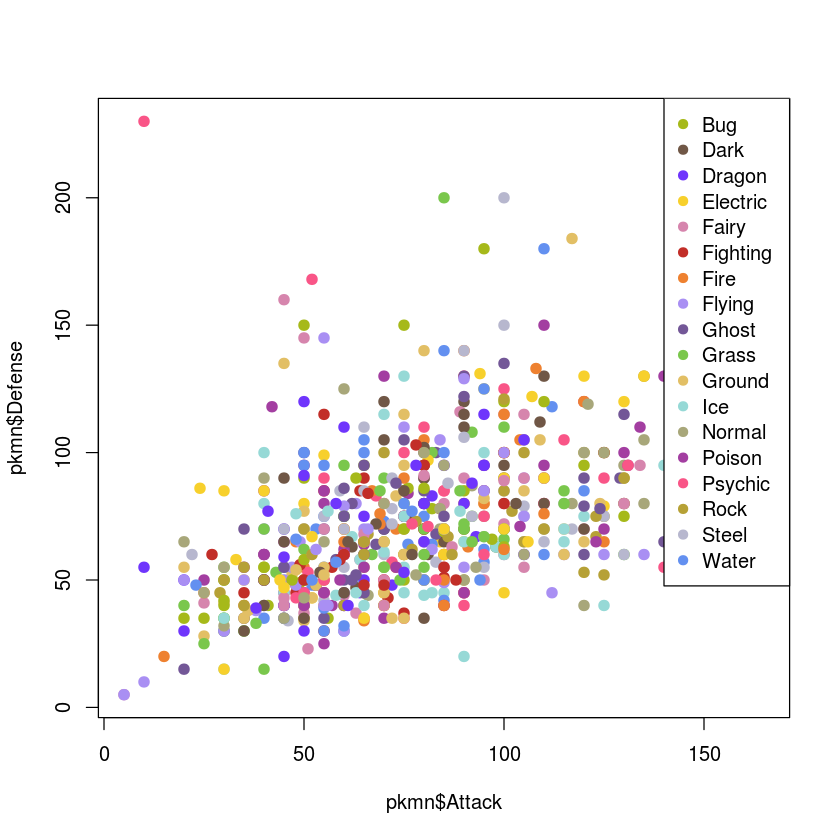

In [123]:
#stats <- c("Total","HP","Attack","Defense","Sp..Atk","Sp..Def","Speed")
#ggplot(data = pkmn,# aes(x = Attack,y = Defense)) +
#    geom_point(aes(col = type_cols))
plot(x = pkmn$Attack, y = pkmn$Defense, col = type_cols, lwd = 2, pch = 19 )
legend("topright", pch = 19, legend = types, col = type_cols)

In [209]:
melt_pkmn_n <- melt(pkmn_n, variable.name = "Stat", value.name = "Value")
#glimpse(melt_pkmn_n)
#type_cols

pkmn_plot <- ggplot(melt_pkmn_n, aes(x = Stat, y = Value, col = Type.1)) +
                    scale_color_manual(breaks = types, values = type_cols)

#pkmn_plot +  geom_point(alpha = 0.8, position = position_dodge(width = 0.5))

ggplot(melt_pkmn_n, aes(x = Stat, y = Value)) +
    geom_boxplot(col = c('red,', 'orange', 'green','teal','blue','violet')) +

# Histogram
ggplot(melt_pkmn_n, aes(x = Stat, fill = variable)) +
    geom_histogram()

# Boxplot

Using Type.1, Type.2 as id variables


ERROR: Error: Don't know how to add o to a plot
